In [53]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [54]:
df=pd.read_csv('US_Accidents_Dec21_updated.csv')
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [55]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [56]:
df.shape

(2845342, 47)

In [57]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

### Data Cleaning

In [58]:
df.isnull().sum().sort_values(ascending=False)

Number                   1743911
Precipitation(in)         549458
Wind_Chill(F)             469643
Wind_Speed(mph)           157944
Wind_Direction             73775
Humidity(%)                73092
Weather_Condition          70636
Visibility(mi)             70546
Temperature(F)             69274
Pressure(in)               59200
Weather_Timestamp          50736
Airport_Code                9549
Timezone                    3659
Nautical_Twilight           2867
Civil_Twilight              2867
Sunrise_Sunset              2867
Astronomical_Twilight       2867
Zipcode                     1319
City                         137
Street                         2
Country                        0
Junction                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Turning_Loop                   0
Traffic_Signal                 0
Traffic_Calming                0
Stop                           0
Station                        0
Roundabout

#### Drop columns with too many null values and minor importance

In [59]:
df.drop(columns=['ID','End_Time','End_Lat','End_Lng','Number','Wind_Chill(F)','Weather_Timestamp','Description'],inplace=True)
df.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,40.108910,-83.092860,3.230,Outerbelt E,R,Dublin,Franklin,OH,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,39.865420,-84.062800,0.747,I-70 E,R,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,39.102660,-84.524680,0.055,I-75 S,R,Cincinnati,Hamilton,OH,...,False,False,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:51:45,41.062130,-81.537840,0.123,I-77 N,R,Akron,Summit,OH,...,False,False,False,False,False,False,Night,Night,Day,Day
4,3,2016-02-08 07:53:43,39.172393,-84.492792,0.500,I-75 S,R,Cincinnati,Hamilton,OH,...,False,False,False,False,False,False,Day,Day,Day,Day


#### Convert to time format and extract year, month, week, hour and day of the week

In [60]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])
df['Year'] = pd.DatetimeIndex(df['Start_Time']).year
df['Month'] = pd.DatetimeIndex(df['Start_Time']).month
df['week'] = pd.DatetimeIndex(df['Start_Time']).week
df['hour'] = pd.DatetimeIndex(df['Start_Time']).hour
df['weekday'] = pd.DatetimeIndex(df['Start_Time']).weekday

c:\Users\dario\anaconda3\envs\downgrade\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  after removing the cwd from sys.path.


In [61]:
df.head(2)

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,County,State,...,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Year,Month,week,hour,weekday
0,3,2016-02-08 00:37:08,40.10891,-83.09286,3.230,Outerbelt E,R,Dublin,Franklin,OH,...,False,Night,Night,Night,Night,2016,2,6,0,0
1,2,2016-02-08 05:56:20,39.86542,-84.06280,0.747,I-70 E,R,Dayton,Montgomery,OH,...,False,Night,Night,Night,Night,2016,2,6,5,0


#### Simplify wind direction column

In [62]:
df.Wind_Direction.unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'West', 'NNW', 'South', 'W', 'NW',
       'North', 'SSE', 'SSW', 'ESE', 'SE', nan, 'East', 'Variable', 'NNE',
       'NE', 'ENE', 'CALM', 'S', 'VAR', 'N', 'E'], dtype=object)

In [63]:
df.replace({'Wind_Direction':{'West':'W',  
                                'North':'N',
                                'South':'S',
                                'East':'E',
                                'Variable':'VAR',
                                'CALM':'Calm'}},inplace=True)
df.Wind_Direction.unique()

array(['SW', 'Calm', 'WSW', 'WNW', 'W', 'NNW', 'S', 'NW', 'N', 'SSE',
       'SSW', 'ESE', 'SE', nan, 'E', 'VAR', 'NNE', 'NE', 'ENE'],
      dtype=object)

#### Simplify Weather condition column 

In [64]:
df.Weather_Condition.unique()

array(['Light Rain', 'Overcast', 'Mostly Cloudy', 'Snow', 'Light Snow',
       'Cloudy', nan, 'Scattered Clouds', 'Clear', 'Partly Cloudy',
       'Light Freezing Drizzle', 'Light Drizzle', 'Haze', 'Rain',
       'Heavy Rain', 'Fair', 'Drizzle', 'Fog', 'Thunderstorms and Rain',
       'Patches of Fog', 'Light Thunderstorms and Rain', 'Mist',
       'Rain Showers', 'Light Rain Showers', 'Heavy Drizzle', 'Smoke',
       'Light Freezing Fog', 'Light Freezing Rain', 'Blowing Snow',
       'Heavy Thunderstorms and Rain', 'Heavy Snow', 'Snow Grains',
       'Squalls', 'Light Fog', 'Shallow Fog', 'Thunderstorm',
       'Light Ice Pellets', 'Thunder', 'Thunder in the Vicinity',
       'Fair / Windy', 'Light Rain with Thunder',
       'Heavy Thunderstorms and Snow', 'Light Snow Showers',
       'Cloudy / Windy', 'Ice Pellets', 'N/A Precipitation',
       'Light Thunderstorms and Snow', 'T-Storm', 'Rain / Windy',
       'Wintry Mix', 'Partly Cloudy / Windy', 'Heavy T-Storm', 'Sand',
       'Ligh

In [65]:
df.Weather_Condition.value_counts()

Fair                        1107194
Mostly Cloudy                363959
Cloudy                       348767
Partly Cloudy                249939
Clear                        173823
                             ...   
Sleet / Windy                     1
Mist / Windy                      1
Blowing Sand                      1
Heavy Freezing Rain               1
Thunder and Hail / Windy          1
Name: Weather_Condition, Length: 127, dtype: int64

In [66]:
df.loc[df['Weather_Condition'].str.contains('Clear|Fair',na=False), 'Weather_Condition'] = 'Clear'
df.loc[df['Weather_Condition'].str.contains('Cloud|Overcast',na=False), 'Weather_Condition'] = 'Cloud'
df.loc[df['Weather_Condition'].str.contains('Heavy Rain|Rain Shower|Heavy T-Storm|Heavy Thunderstorms|T-Storm',na=False),'Weather_Condition'] = 'Heavy_Rain'
df.loc[df['Weather_Condition'].str.contains('Snow|Sleet|Ice|Freezing|Wintry Mix',na=False),'Weather_Condition'] = 'Snow' 
df.loc[df['Weather_Condition'].str.contains('Rain|storm|Drizzle',na=False), 'Weather_Condition'] = 'Rain' 
df.loc[df['Weather_Condition'].str.contains('Heavy Snow|Heavy Sleet|Heavy Ice Pellets|Snow Showers|Squalls',na=False),'Weather_Condition'] = 'Heavy_Snow'
df.loc[df['Weather_Condition'].str.contains('Fog',na=False),'Weather_Condition'] = 'Fog'
df.loc[df['Weather_Condition'].str.contains('Sand',na=False),'Weather_Condition'] = 'Sand'
df.loc[df['Weather_Condition'].str.contains('Smoke',na=False),'Weather_Condition'] = 'Smoke' 
df.loc[df['Weather_Condition'].str.contains('Haze|Mist',na=False),'Weather_Condition'] = 'Haze' 
df.loc[df['Weather_Condition'].str.contains('Dust',na=False),'Weather_Condition'] = 'Dust'
df.loc[df['Weather_Condition'].str.contains('Thunder',na=False),'Weather_Condition'] = 'Thunder'
df.loc[df['Weather_Condition'].str.contains('Hail',na=False),'Weather_Condition'] = 'Hail'


df.Weather_Condition.unique()

array(['Rain', 'Cloud', 'Snow', nan, 'Clear', 'Haze', 'Fog', 'Smoke',
       'Heavy_Snow', 'Thunder', 'N/A Precipitation', 'Sand', 'Dust',
       'Volcanic Ash', 'Hail', 'Showers in the Vicinity', 'Tornado'],
      dtype=object)

In [67]:
df.Weather_Condition.value_counts()

Clear                      1296212
Cloud                      1109693
Rain                        205054
Snow                         59667
Fog                          43526
Haze                         37930
Thunder                      13189
Smoke                         7246
N/A Precipitation             1079
Showers in the Vicinity        650
Dust                           359
Hail                            34
Heavy_Snow                      32
Sand                            22
Tornado                          9
Volcanic Ash                     4
Name: Weather_Condition, dtype: int64

# EDA

### Map of accidents by severity

Text(0.5, 1.05, 'Map of accidents')

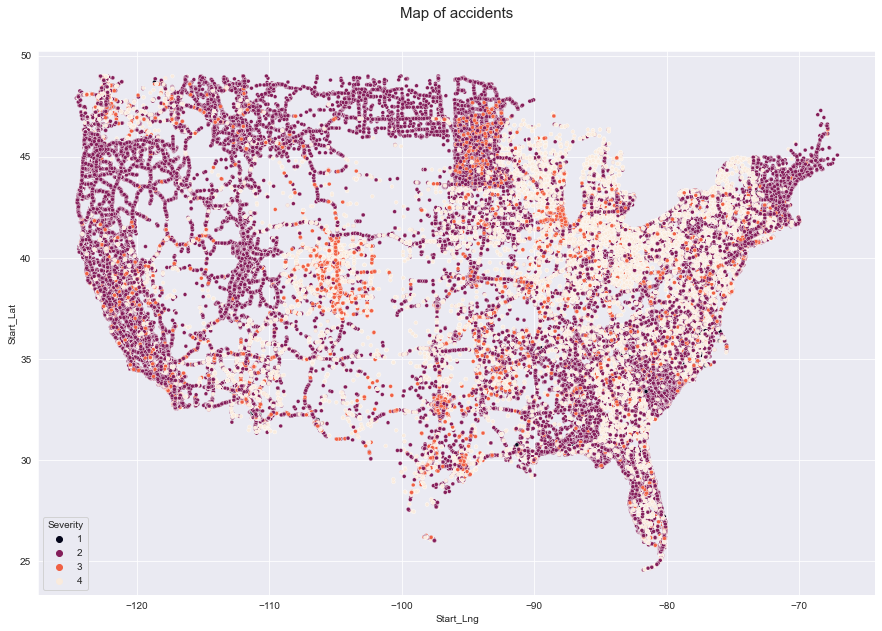

In [68]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=df['Start_Lng'],y=df['Start_Lat'],data=df,hue=df['Severity'],s=15,palette='rocket')
plt.title('Map of accidents', size=15, y=1.05)

### Accidents by state

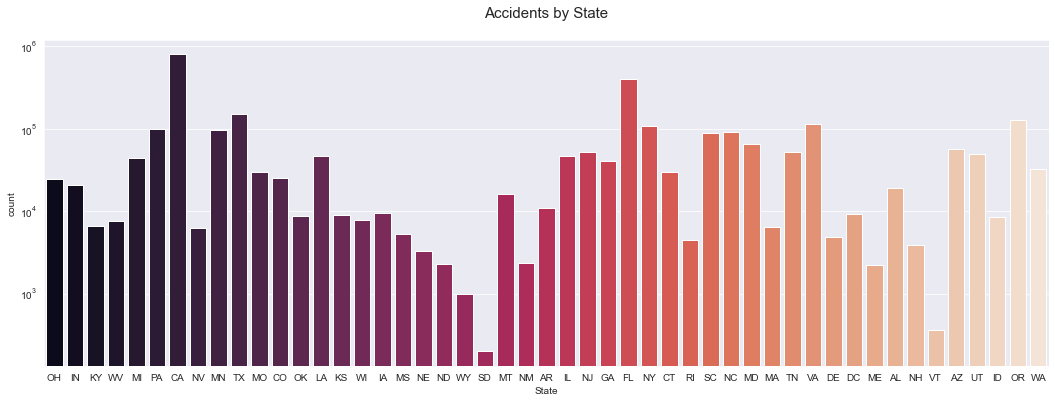

In [69]:
plt.figure(figsize=(18,6))
plt.yscale("log")
plt.title('Accidents by State', size=15, y=1.05)
sns.countplot(data=df,x='State',palette="rocket")
plt.show()

### Top 10 Cities with highest number of accidents

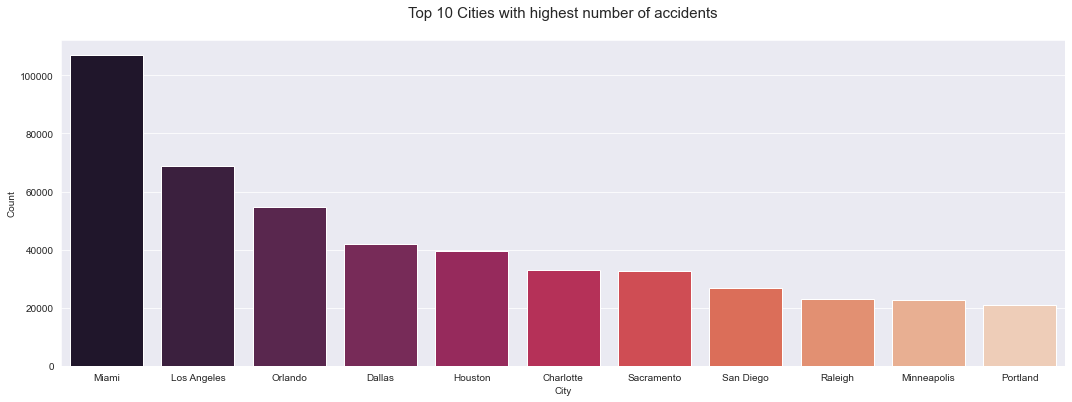

In [70]:
top10=df['City'].value_counts().sort_values(ascending=False).iloc[0:11].reset_index()
top10.columns=['City','Count']
plt.figure(figsize=(18,6))
plt.title('Top 10 Cities with highest number of accidents', size=15, y=1.05)
sns.barplot(data=top10,x=top10['City'],y=top10['Count'],palette='rocket')
plt.show()

### Accidents by severity

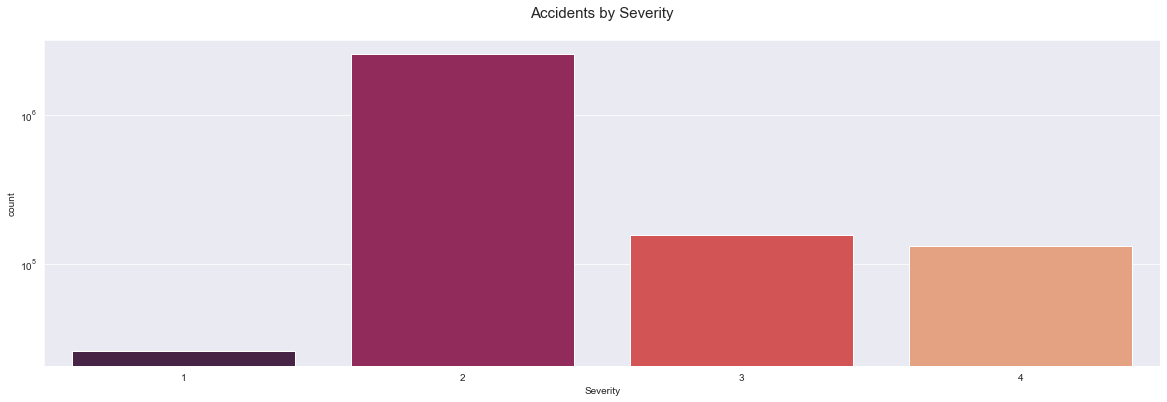

In [71]:
plt.figure(figsize=(20,6))
plt.yscale("log")
plt.title('Accidents by Severity', size=15, y=1.05)
sns.countplot(data=df,x='Severity',palette='rocket')
plt.show()


### Accidents by year

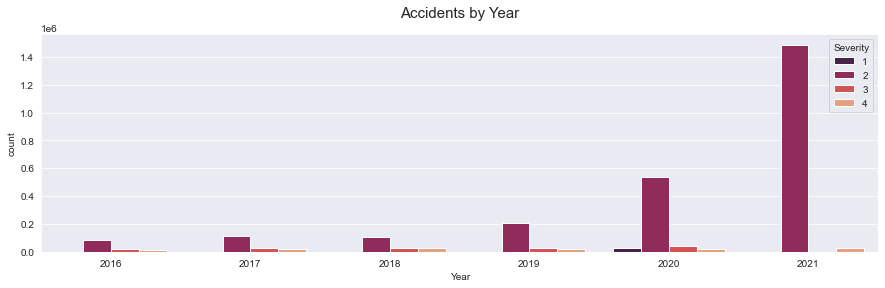

In [72]:
plt.figure(figsize=(15,4))
sns.set_style("darkgrid")
sns.countplot(data=df,x='Year',palette='rocket',hue='Severity')
plt.title('Accidents by Year', size=15, y=1.05)
plt.show()  

### Accidents by month

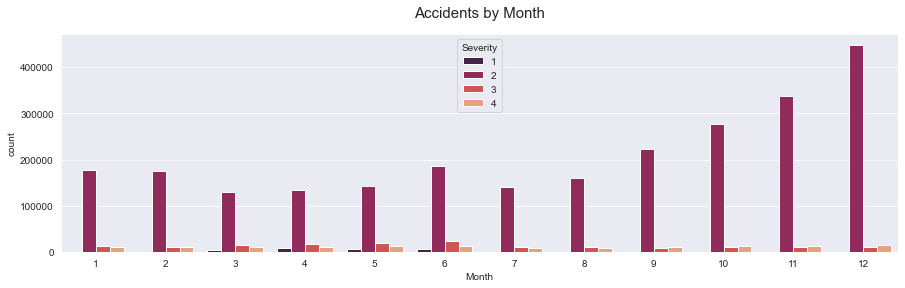

In [73]:
plt.figure(figsize=(15,4))
sns.set_style("darkgrid")
sns.countplot(data=df,x='Month',palette='rocket',hue='Severity')
plt.title('Accidents by Month', size=15, y=1.05)
plt.show()  

### Accidents by week

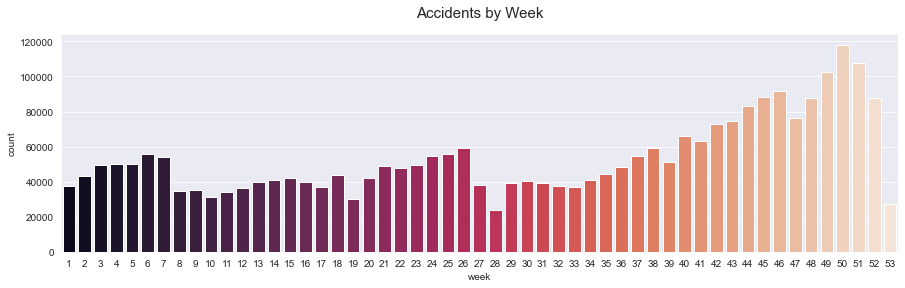

In [74]:
plt.figure(figsize=(15,4))
sns.set_style("darkgrid")
sns.countplot(data=df,x='week',palette="rocket")
plt.title('Accidents by Week', size=15, y=1.05)
plt.show() 

### Accidents by hour

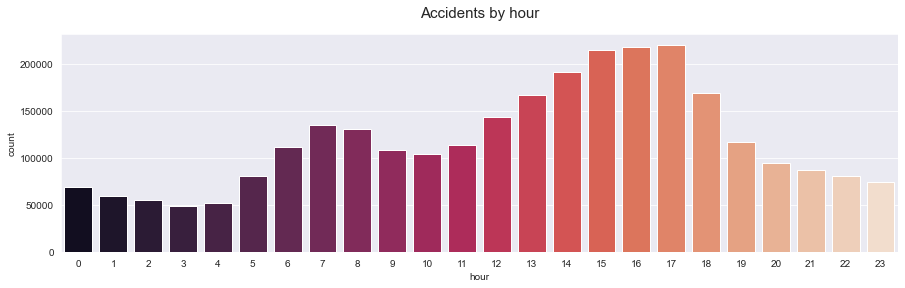

In [75]:
plt.figure(figsize=(15,4))
sns.set_style("darkgrid")
sns.countplot(data=df,x='hour',palette="rocket")
plt.title('Accidents by hour', size=15, y=1.05)
plt.show() 

### Accidents by week day

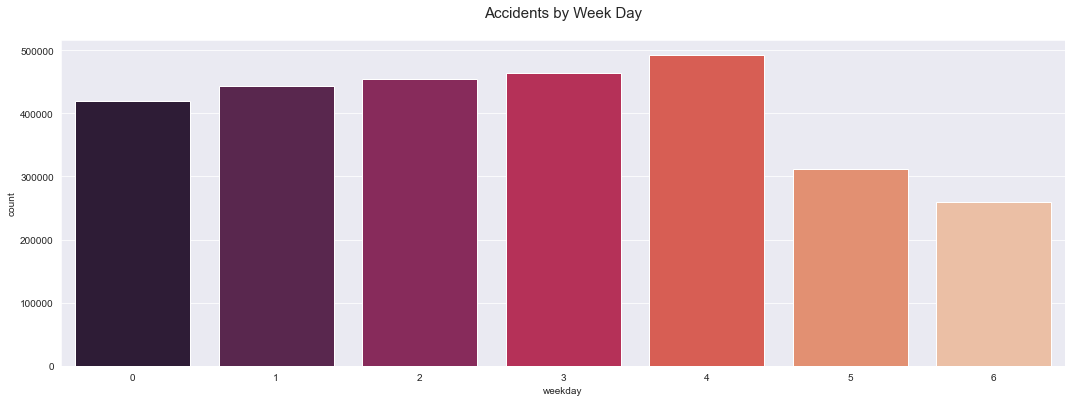

In [76]:
plt.figure(figsize=(18,6))
sns.set_style("darkgrid")
ax=sns.countplot(data=df,x='weekday',palette="rocket")
plt.title('Accidents by Week Day', size=15, y=1.05)
plt.show() 

### Accidents by twilight types

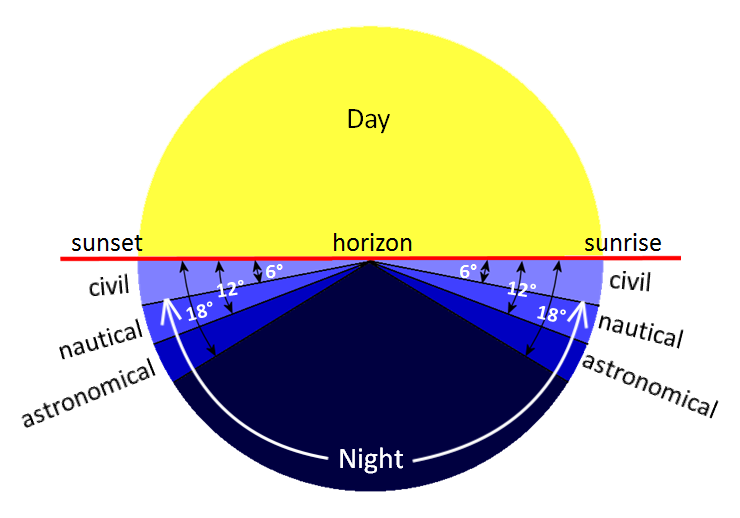

In [77]:

from IPython.display import Image
Image(filename=r'D:\CODIGOS\Github\NYC_ACCIDENTES\twilight_types.png')

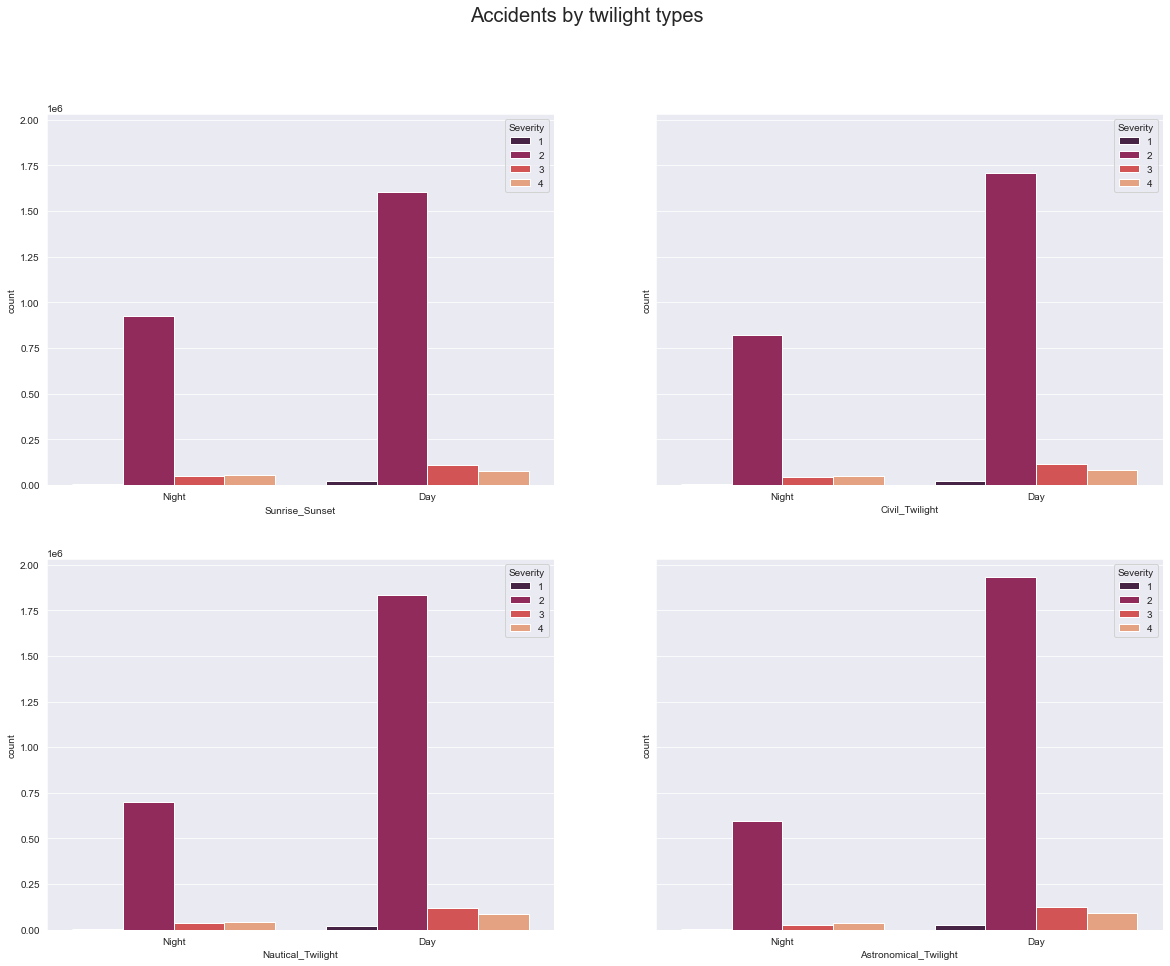

In [78]:
fig, axes = plt.subplots(2,2, figsize=(20, 15), sharey=True)
fig.suptitle('Accidents by twilight types', fontsize=20) 
sns.countplot(data=df,x='Sunrise_Sunset',palette="rocket",ax=axes[0,0],hue='Severity')    
sns.countplot(data=df,x='Civil_Twilight',palette="rocket",ax=axes[0,1],hue='Severity')  
sns.countplot(data=df,x='Nautical_Twilight',palette="rocket",ax=axes[1,0],hue='Severity')    
sns.countplot(data=df,x='Astronomical_Twilight',palette="rocket",ax=axes[1,1],hue='Severity') 
plt.show()

### Accidents by to weather conditions

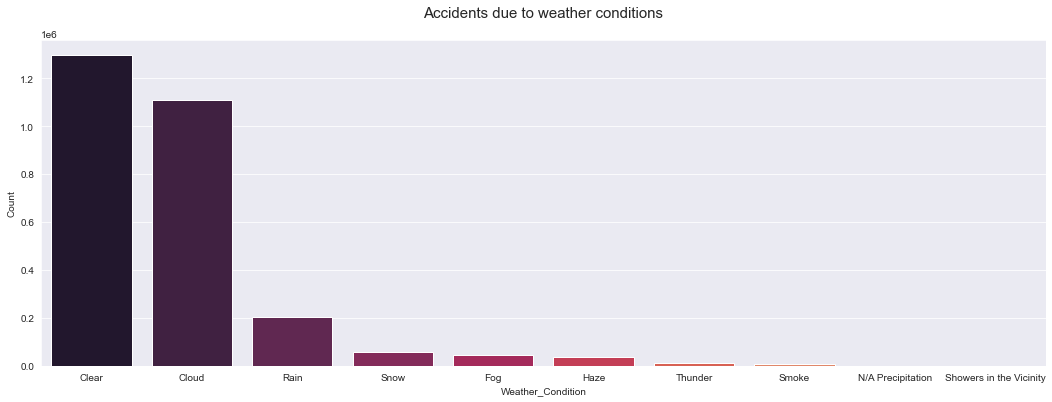

In [88]:
top_wheather=df['Weather_Condition'].value_counts().sort_values(ascending=False).iloc[0:10].reset_index()
top_wheather.columns = ['Weather_Condition','Count']
plt.figure(figsize=(18,6))
sns.barplot(data=top_wheather,x=top_wheather['Weather_Condition'],y=top_wheather['Count'],palette='rocket')
plt.title('Accidents due to weather conditions', size=15, y=1.05)
plt.show()


### Accident distribution by weather elements

<AxesSubplot:xlabel='Severity', ylabel='Precipitation(in)'>

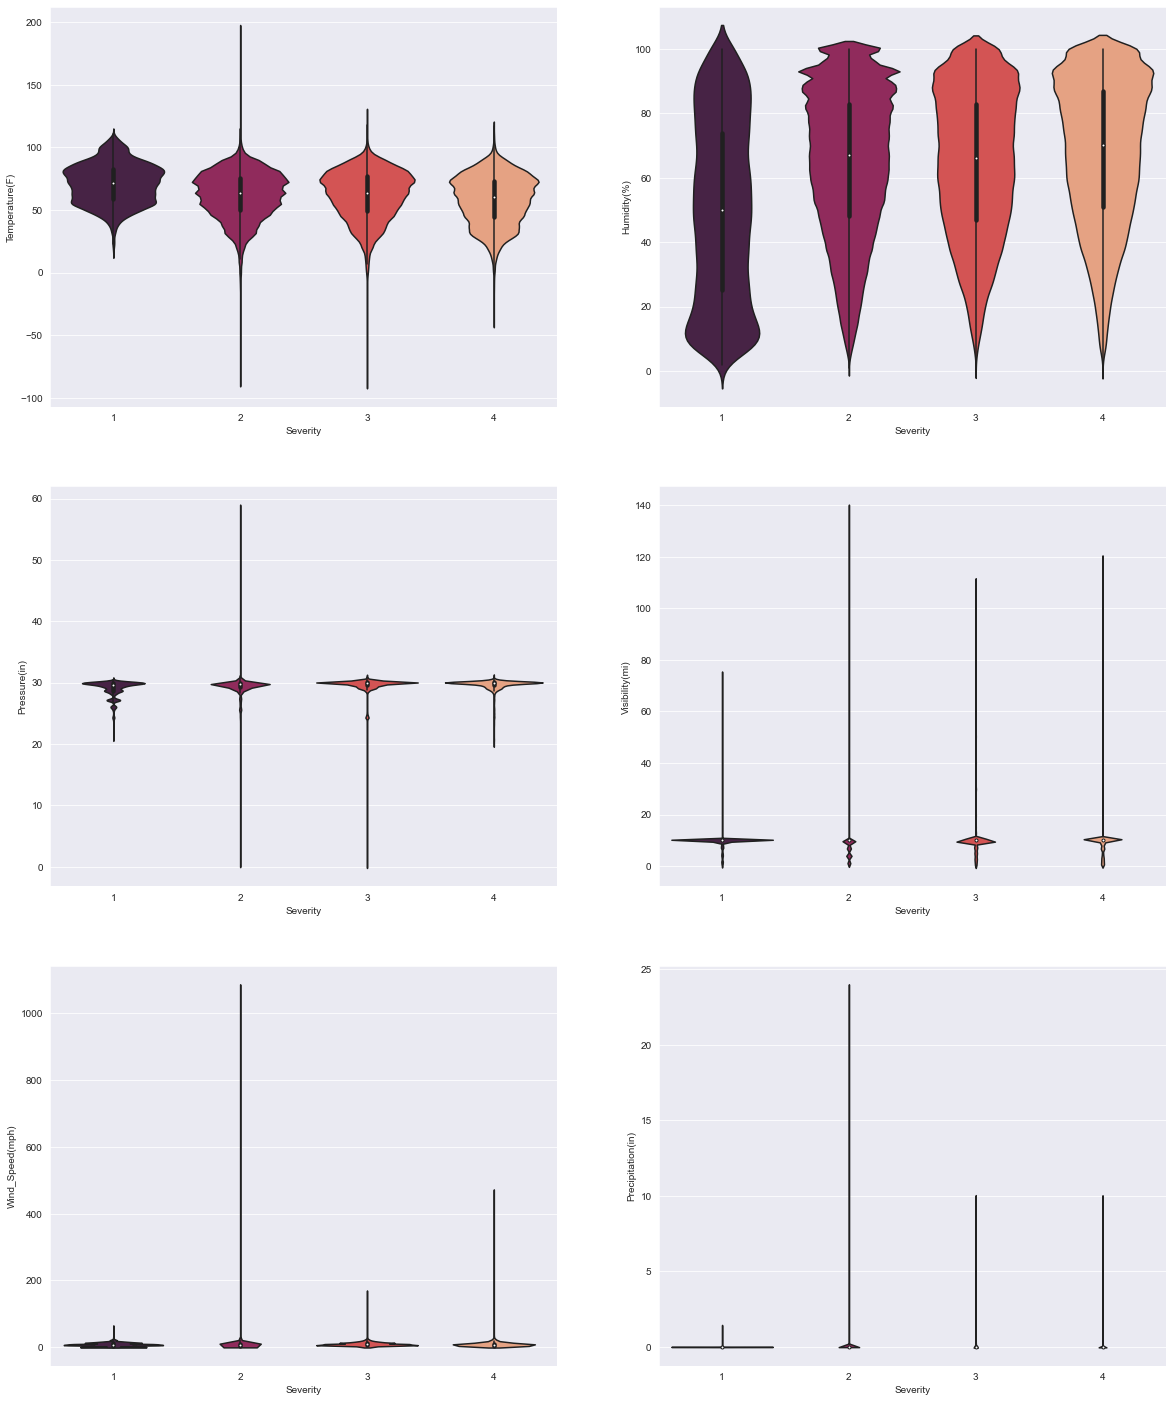

In [28]:
fig, axes = plt.subplots(3,2, figsize=(20, 25), sharey=False)
sns.violinplot(data=df, x='Severity', y='Temperature(F)',palette='rocket',ax=axes[0,0])
sns.violinplot(data=df, x='Severity', y='Humidity(%)',palette='rocket',ax=axes[0,1])
sns.violinplot(data=df, x='Severity', y='Pressure(in)',palette='rocket',ax=axes[1,0])
sns.violinplot(data=df, x='Severity', y='Visibility(mi)',palette='rocket',ax=axes[1,1])
sns.violinplot(data=df, x='Severity', y='Wind_Speed(mph)',palette='rocket',ax=axes[2,0])
sns.violinplot(data=df, x='Severity', y='Precipitation(in)',palette='rocket',ax=axes[2,1])

## CLASSIFICATION MODEL

### PREPROCESSING

### Define a function to add categorical columns

In [29]:
def add_column(df,whater_condition,column):
    new_column = []
    for  i in df[column]:
        if whater_condition == i:
            new_column.append(1)
        else:
            new_column.append(0)
    df[whater_condition] = new_column

### Create categorical columns

In [30]:
dfn=df
dfn.dropna(inplace=True)
wacon=list(map(str, top_wheather['Weather_Condition']))
for i in wacon:
    add_column(dfn,i,'Weather_Condition')
dfn.drop(columns=['Weather_Condition','Turning_Loop','Country','County'],inplace=True)

In [31]:
dfn.shape

(2240917, 50)

In [32]:
dfn.head(2)

,Severity,Start_Time,Start_Lat,Start_Lng,Distance(mi),Street,Side,City,State,Zipcode,...,Clear,Cloud,Rain,Snow,Fog,Haze,Thunder,Smoke,N/A Precipitation,Showers in the Vicinity
0,3,2016-02-08 00:37:08,40.108910,-83.092860,3.23,Outerbelt E,R,Dublin,OH,43017,...,0,0,1,0,0,0,0,0,0,0
4,3,2016-02-08 07:53:43,39.172393,-84.492792,0.50,I-75 S,R,Cincinnati,OH,45217,...,0,0,1,0,0,0,0,0,0,0


In [33]:
categorical_columns = dfn.select_dtypes(include=['object','bool']).columns
categorical_columns

Index(['Street', 'Side', 'City', 'State', 'Zipcode', 'Timezone',
       'Airport_Code', 'Wind_Direction', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Sunrise_Sunset',
       'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

In [34]:
from sklearn import preprocessing

for i in categorical_columns:
    en = preprocessing.LabelEncoder()
    dfn[i]= en.fit_transform(dfn[i])

### Correlation Map

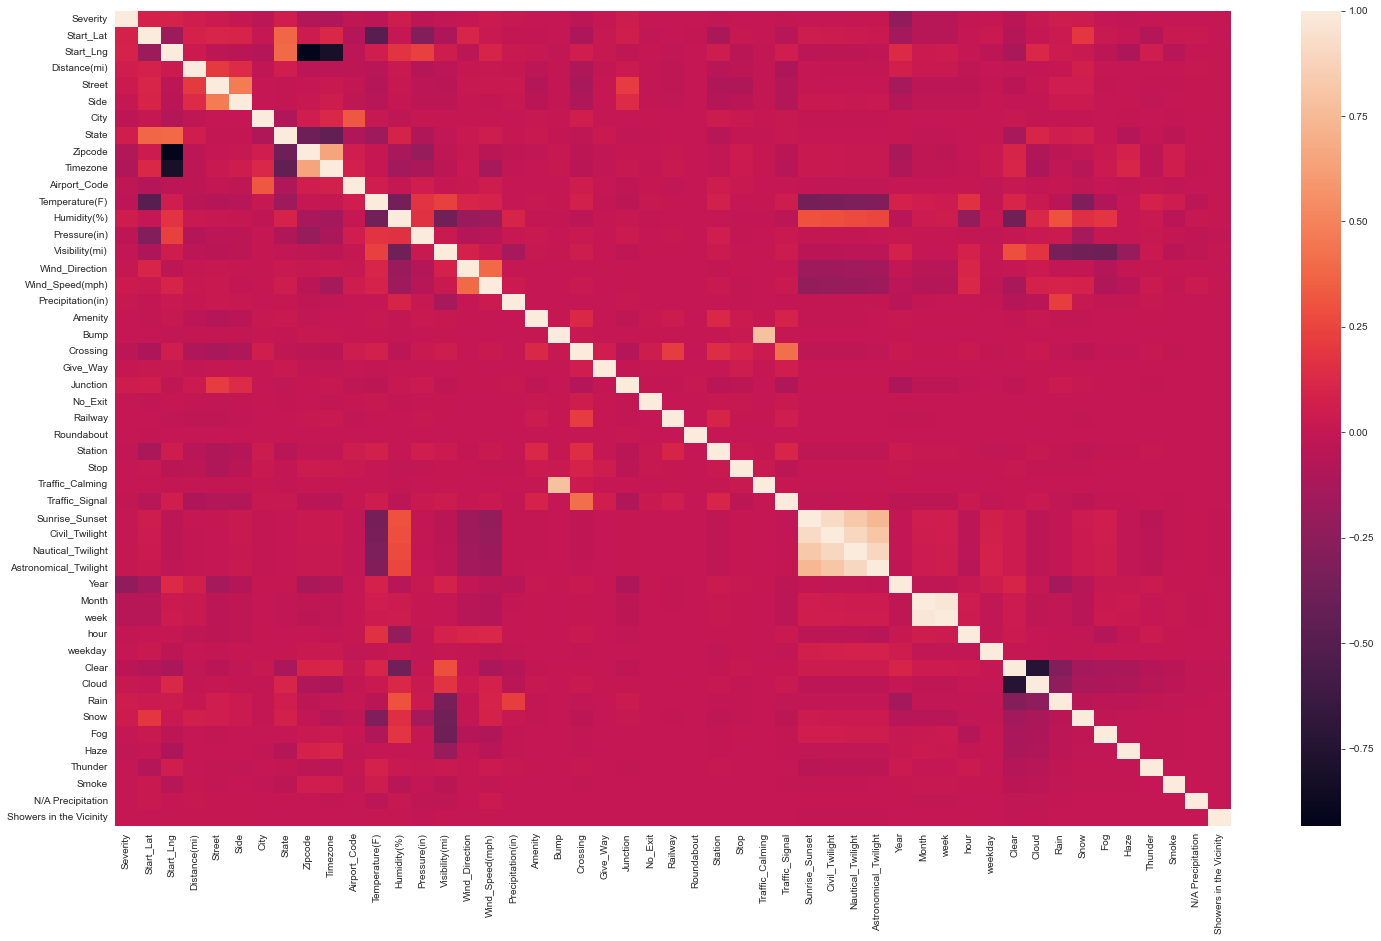

In [47]:
sns.heatmap(dfn.corr())
plt.rcParams['figure.figsize'] = (25,15)
plt.show() 

### Correlation table

In [36]:
corr=dfn.corr()
corr_triu = corr.where(~np.tril(np.ones(corr.shape)).astype(np.bool))
corr_triu = corr_triu.stack()
corrtarget=corr_triu.loc['Severity'].sort_values(ascending=False).iloc[0:10].reset_index()
corrtargetn=corr_triu.loc['Severity'].sort_values(ascending=False).iloc[-10:].reset_index()
corrtarget.columns = ['Var','Corr']
corrtargetn.columns = ['Var','Corr']
corr1=list(map(str, corrtarget['Var']))
corr2=list(map(str, corrtargetn['Var']))
correlation = corr1 + corr2

c:\Users\dario\anaconda3\envs\downgrade\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


### Train Test split

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

In [40]:
pos=list(map(str, corrtarget['Var']))
neg=list(map(str, corrtargetn['Var']))
c= pos + neg 
Y=np.array(dfn['Severity'])
X=dfn[correlation]
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state=100)

### Logistic Regresion Model 

In [42]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}
lr=LogisticRegression()
logreg_cv = GridSearchCV(lr,parameters,cv=10)
logreg_cv.fit(X_train,Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [43]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.924987714166593


In [45]:
LR_Accuracy_Score=logreg_cv.score(X_test,Y_test)
LR_Accuracy_Score

0.9245733895007407